<a href="https://colab.research.google.com/github/myazzeh/NLP-Course/blob/main/Word_2_Vec%20/NLP_Word2Vec.ipynb/NLP_Word2Vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Install gensim Library**

In [1]:
!pip install gensim

#**Import Required Libraries:**
1- gensim.model.Word2Vec \
2- gensim.model.Doc2Vec \
3- gensim.model.FastText \

In [2]:
import gensim
from gensim.models import Word2Vec, Doc2Vec, FastText
from sklearn.model_selection import train_test_split
import pandas as pd

In [3]:
!wget https://raw.githubusercontent.com/myazzeh/NLP-Course/main/Word_2_Vec/Spam.csv

--2024-09-26 10:10:27--  https://raw.githubusercontent.com/myazzeh/NLP-Course/main/Word_2_Vec/Spam.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 485702 (474K) [text/plain]
Saving to: ‘Spam.csv’

Spam.csv            100%[===================>] 474.32K  --.-KB/s    in 0.03s   

2024-09-26 10:10:27 (13.9 MB/s) - ‘Spam.csv’ saved [485702/485702]



In [4]:
df = pd.read_csv('Spam.csv')
df.head()


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
X= df['Message']
y= df['Category']
y.replace('spam', 1, inplace=True)
y.replace('ham', 0, inplace=True)
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [6]:
x_train = [txt.split() for txt in x_train]
x_test = [txt.split() for txt in x_test]

In [7]:
x_train[0:3]

[['Congratulations!',
  'Thanks',
  'to',
  'a',
  'good',
  'friend',
  'U',
  'have',
  'WON',
  'the',
  '£2,000',
  'Xmas',
  'prize.',
  '2',
  'claim',
  'is',
  'easy,',
  'just',
  'call',
  '08718726971',
  'NOW!',
  'Only',
  '10p',
  'per',
  'minute.',
  'BT-national-rate.'],
 ['Ü', 'bot', 'notes', 'oredi...', 'Cos', 'i', 'juz', 'rem', 'i', 'got...'],
 ['My',
  'tuition',
  'is',
  'at',
  '330.',
  'Hm',
  'we',
  'go',
  'for',
  'the',
  '1120',
  'to',
  '1205',
  'one?',
  'Do',
  'you',
  'mind?']]

#**Build Word2Vec Model**

In [8]:
model= Word2Vec(sentences= x_train,
                vector_size=10,
                window=3,
                sg=1,
                epochs=50)

In [9]:
vocab = model.wv.index_to_key
print(vocab)
print(f"length of vocab is {len(vocab)}")

['to', 'you', 'I', 'a', 'the', 'and', 'i', 'is', 'in', 'for', 'u', 'my', 'of', 'your', 'me', 'on', 'have', '2', 'that', 'are', 'it', 'or', 'at', 'be', 'call', 'not', 'get', 'will', 'with', 'can', 'U', 'ur', "I'm", 'so', 'but', 'from', 'You', '&lt;#&gt;', 'do', 'up', 'just', 'go', 'if', '4', '.', 'we', 'all', 'know', 'like', 'when', 'this', 'was', 'got', 'out', 'am', 'come', 'now', '?', 'want', 'about', 'only', 'Call', 'send', 'going', 'need', 'by', 'then', '...', 'what', 'he', 'But', 'still', 'as', 'n', 'one', 'How', 'If', "I'll", 'home', 'No', 'has', 'time', 'no', 'our', 'text', 'Just', 'good', 'see', '&', 'its', 'how', 'there', 'We', 'Your', 'So', 'ü', 'been', 'some', 'r', 'think', 'love', 'back', 'dont', "don't", 'My', 'And', 'day', 'The', 'Do', 'an', 'her', 'mobile', 'Ok', 'any', "i'm", 'free', 'What', 'they', 'phone', 'give', 'now.', 'tell', 'take', 'more', 'me.', '&amp;', 'him', 'FREE', 'ask', 'd', 'great', 'say', 'Are', 'To', 'Have', 'you.', 'she', 'make', '-', 'who', 'had', 'me

In [10]:
model.wv['message']

array([-0.04673868,  0.2172237 ,  0.91317177, -0.30249226,  1.2773535 ,
        1.0423365 ,  1.0960186 ,  0.7288903 ,  0.2321205 , -0.20001121],
      dtype=float32)

In [11]:
# How to create vector for each sentence
model.wv.similar_by_word('message', topn=10)

[('with', 0.9047409892082214),
 ('yo', 0.8929517865180969),
 ('week?', 0.8844612836837769),
 ('click', 0.8731178641319275),
 ('WAP', 0.8723307847976685),
 ('replying', 0.8615977168083191),
 ('into', 0.8604306578636169),
 ('FREE', 0.8603718280792236),
 ('video', 0.8573005199432373),
 ('selection', 0.8570714592933655)]

In [12]:
model.wv.most_similar('message', topn=10)

[('with', 0.9047409892082214),
 ('yo', 0.8929517865180969),
 ('week?', 0.8844612836837769),
 ('click', 0.8731178641319275),
 ('WAP', 0.8723307847976685),
 ('replying', 0.8615977168083191),
 ('into', 0.8604306578636169),
 ('FREE', 0.8603718280792236),
 ('video', 0.8573005199432373),
 ('selection', 0.8570714592933655)]

###Visualize Word Embedding using tSNE

In [23]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np # import numpy
%matplotlib inline
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.key_to_index:
        tokens.append(model.wv[word])
        labels.append(word)

    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(np.array(tokens)) # convert tokens to a numpy array

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(16, 16))
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


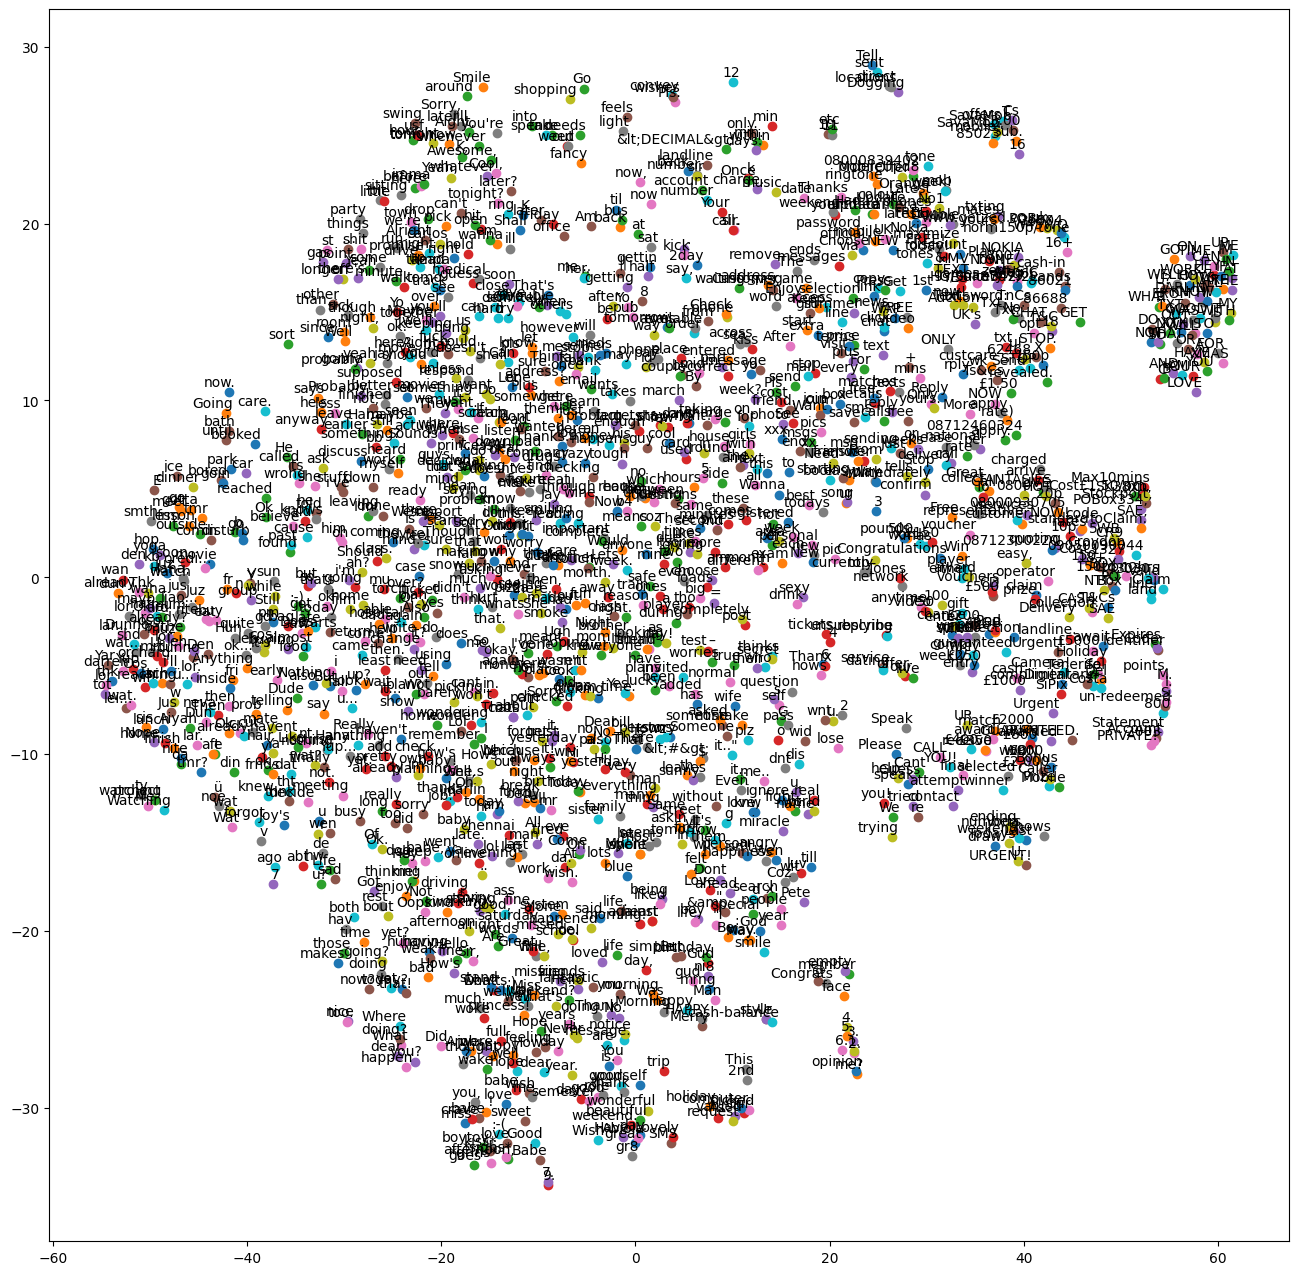

In [24]:
tsne_plot(model)

#**Save The vectors in lookup table**

In [25]:
from gensim.test.utils import get_tmpfile
from gensim.models import KeyedVectors

# Save vectors using get_tmpfile
fname = get_tmpfile("vectors.kv")
model.wv.save(fname)

#Reload word_vectors
word_vectors = KeyedVectors.load(fname, mmap='r')

#**Using Pre-trained Google W2V model**

In [26]:
import gensim.downloader as api

word_vectors = api.load("glove-wiki-gigaword-100")  # load pre-trained word-vectors from gensim-data

[==================================================] 100.0% 128.1/128.1MB downloaded


In [27]:
#Check if the vectors are cosemantically accurate
result = word_vectors.most_similar(positive=['woman', 'king'], negative=['man'])
print("{}: {:.4f}".format(*result[0]))

queen: 0.7699


In [28]:
word_vectors['queen']

array([-0.50045 , -0.70826 ,  0.55388 ,  0.673   ,  0.22486 ,  0.60281 ,
       -0.26194 ,  0.73872 , -0.65383 , -0.21606 , -0.33806 ,  0.24498 ,
       -0.51497 ,  0.8568  , -0.37199 , -0.58824 ,  0.30637 , -0.30668 ,
       -0.2187  ,  0.78369 , -0.61944 , -0.54925 ,  0.43067 , -0.027348,
        0.97574 ,  0.46169 ,  0.11486 , -0.99842 ,  1.0661  , -0.20819 ,
        0.53158 ,  0.40922 ,  1.0406  ,  0.24943 ,  0.18709 ,  0.41528 ,
       -0.95408 ,  0.36822 , -0.37948 , -0.6802  , -0.14578 , -0.20113 ,
        0.17113 , -0.55705 ,  0.7191  ,  0.070014, -0.23637 ,  0.49534 ,
        1.1576  , -0.05078 ,  0.25731 , -0.091052,  1.2663  ,  1.1047  ,
       -0.51584 , -2.0033  , -0.64821 ,  0.16417 ,  0.32935 ,  0.048484,
        0.18997 ,  0.66116 ,  0.080882,  0.3364  ,  0.22758 ,  0.1462  ,
       -0.51005 ,  0.63777 ,  0.47299 , -0.3282  ,  0.083899, -0.78547 ,
        0.099148,  0.039176,  0.27893 ,  0.11747 ,  0.57862 ,  0.043639,
       -0.15965 , -0.35304 , -0.048965, -0.32461 , 

#**Create Sentence Vector (State Vctor)**

In [29]:
import numpy as np
def GenerateSentencevector(w2v_model, data):
  state_vect=[]
  for sentence in data:
    temp= np.zeros(w2v_model.vector_size)
    for token in sentence:
      if token in w2v_model:
        temp = temp + np.array(w2v_model[token])
    state_vect.append(temp / len(sentence))

  return np.array(state_vect)

Xtrain = GenerateSentencevector(model.wv, x_train)
Xtest  = GenerateSentencevector(model.wv, x_test)

#using Pretrained
#Xtrain = GenerateSentencevector(word_vectors, x_train)
#Xtest  = GenerateSentencevector(word_vectors, x_test)

In [30]:
Xtrain

array([[ 0.16429567,  0.45026149,  0.64467791, ...,  0.02464381,
        -0.65626707, -0.76124161],
       [ 0.01545841, -0.2434209 ,  0.22061998, ...,  0.32091717,
        -0.82472743, -0.36307555],
       [-0.12481588, -0.03320151,  0.42940698, ...,  0.32841507,
        -0.4056798 , -0.06541427],
       ...,
       [-0.1843305 ,  0.02834389,  0.59083961, ...,  0.64382228,
        -0.48782134, -0.09014557],
       [-0.02839208, -0.01679054,  0.10134197, ...,  0.24303308,
        -0.48771177, -0.04905369],
       [-0.28065139, -0.09857626,  0.35453195, ...,  0.06484504,
        -0.66872587,  0.04932696]])

#**Build classification model**

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
lr.fit(Xtrain, y_train)
prd_lr = lr.predict(Xtest)
print(f'Accuracy of logisitic regression is {accuracy_score(y_test, prd_lr)}')

Accuracy of logisitic regression is 0.9575358851674641


In [32]:
nvb = GaussianNB()
nvb.fit(Xtrain, y_train)
prd_nvb = nvb.predict(Xtest)
print(f'Accuracy of naive Bays is {accuracy_score(y_test, prd_nvb)}')

Accuracy of naive Bays is 0.9174641148325359


In [33]:
# build classification model using Neural Networks

from keras.layers import Input, Dense
from keras.models import Sequential

nn = Sequential(
    [
        Input(shape = (10,)),
        Dense(units= 8, activation= 'relu'),
        Dense(units= 4, activation= 'relu'),
        Dense(units= 1, activation= 'sigmoid'),

    ]
)

nn.compile(optimizer ='adam', loss='binary_crossentropy', metrics=['accuracy'])
nn.fit(Xtrain, y_train, epochs=20)
nn.evaluate(Xtest, y_test)

Epoch 1/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6158 - loss: 0.6822
Epoch 2/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8650 - loss: 0.3873
Epoch 3/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8664 - loss: 0.2965
Epoch 4/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9070 - loss: 0.2136
Epoch 5/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9483 - loss: 0.1544
Epoch 6/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9491 - loss: 0.1344
Epoch 7/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9575 - loss: 0.1177
Epoch 8/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9663 - loss: 0.1023
Epoch 9/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9641 - loss: 0.1136
Epoch 10/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9690 - loss: 0.1011
Epoch 11/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9641 - loss: 0.0986
Epoch 12/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

[0.11830414831638336, 0.9587320685386658]